In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#from sklearn.preprocessing import Normalizer #remove this?
plt.style.use('ggplot')

# Setting up
Lets first read our data and see what we are dealing with. We are going to predict housing prices in King County, WA.

In [79]:
df = pd.read_csv('kc_house_data.csv')

In [80]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [83]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


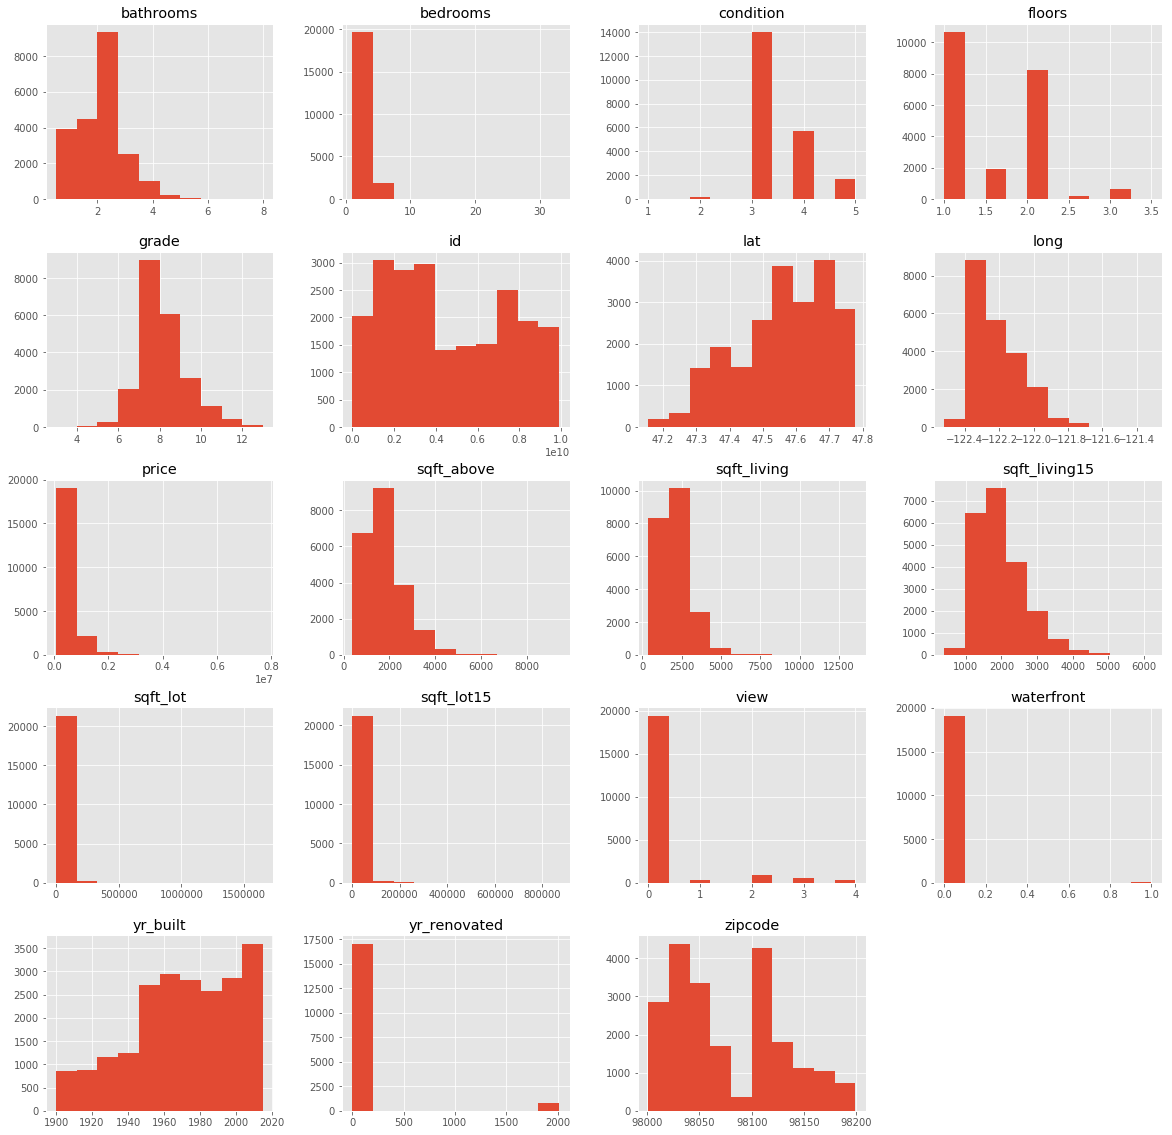

In [84]:
plt.style.use('ggplot')
df.hist(figsize = (20,20));

## TO CLEAN
So we have a mix of catagorical data as well as continious. Our target (price) and a good portion of our sqft data is skewed to the right. We will need to fix that before we run any analysis. Also there are a few varibles that aren't the correct data type.

Need to make dummy variables for the catagories: view, waterfront, condition, floors, zipcode.


Lets check the how random the missing data is using a nifty library [missingno](https://github.com/ResidentMario/missingno).

In [7]:
import missingno as msno

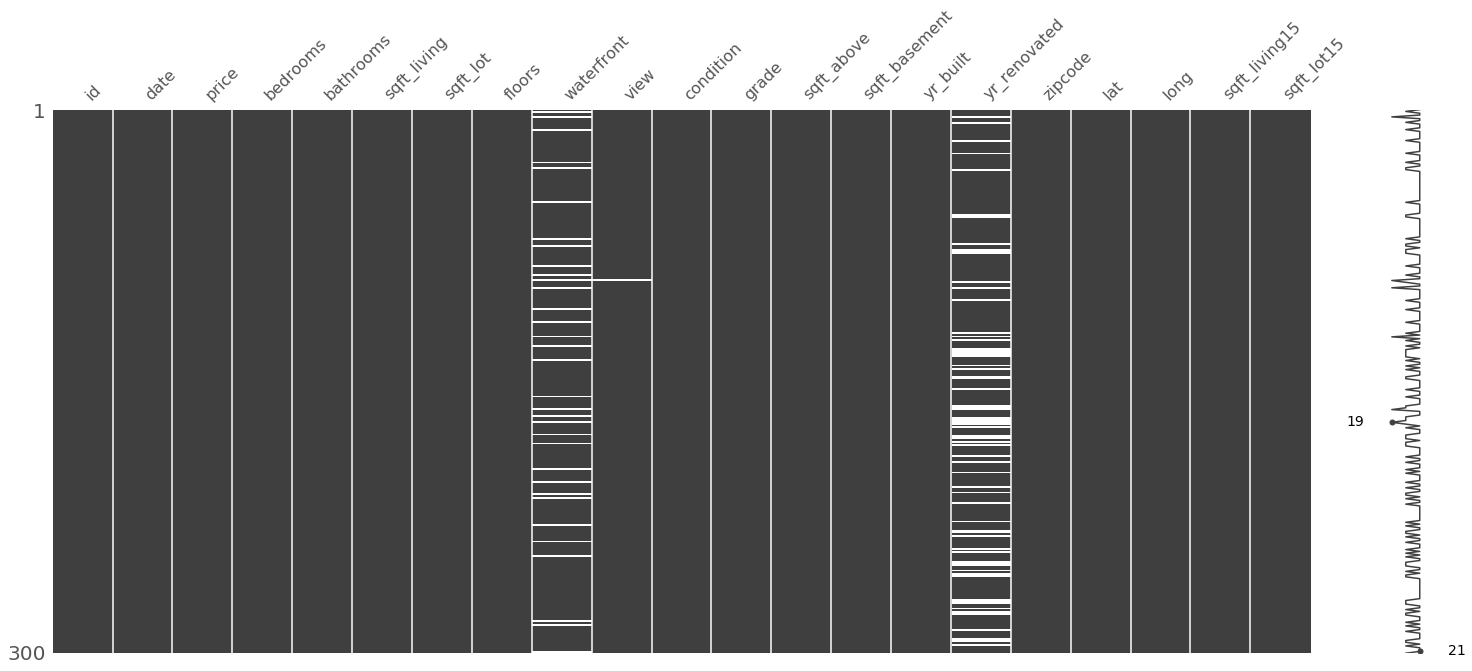

In [8]:
df = df.replace("nan", np.nan) #makes all the nan values into the pandas friendly version. 
msno.matrix(df.sample(300))

So this shows us a sample of our data set and where the data is missing by columns. It looks fairly random where it is missing. That is good.

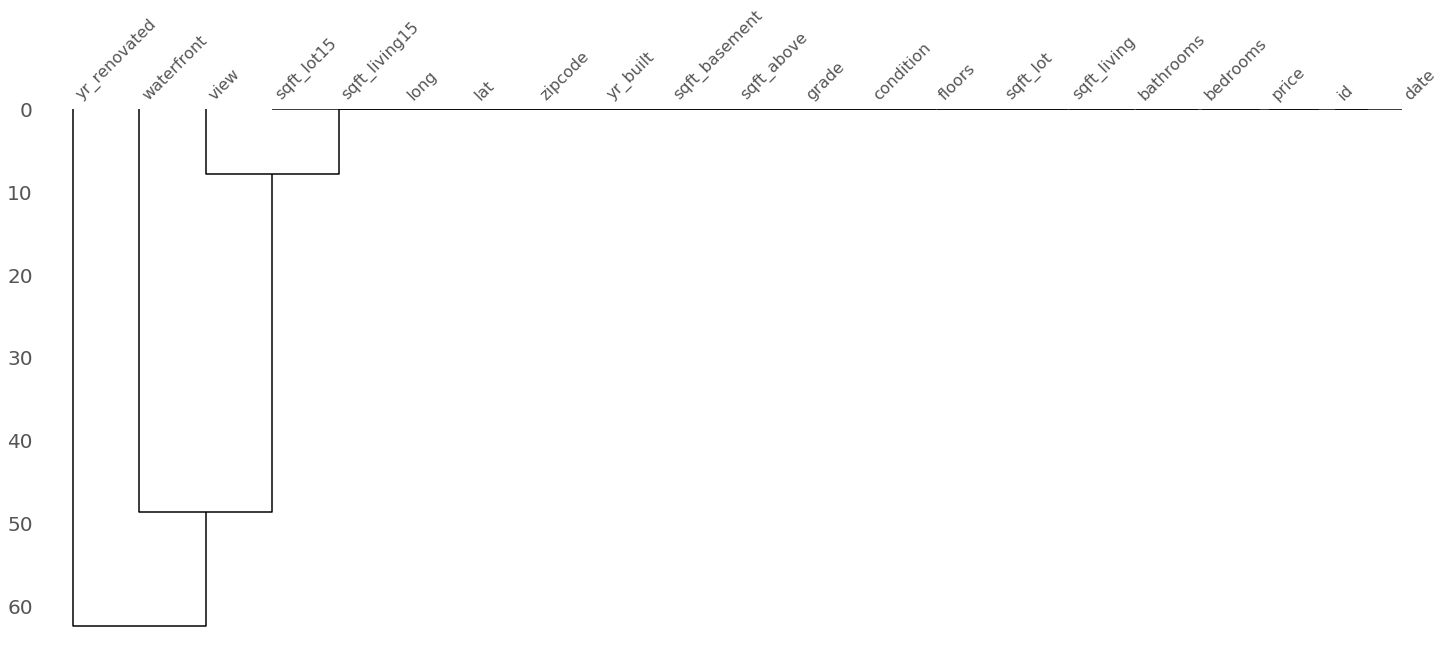

In [10]:
msno.dendrogram(df)

Viewing the dendrogram, we can see that the missing waterfront and yr_renovated do not correspond within their own missing data. We can verify it with the heatmap

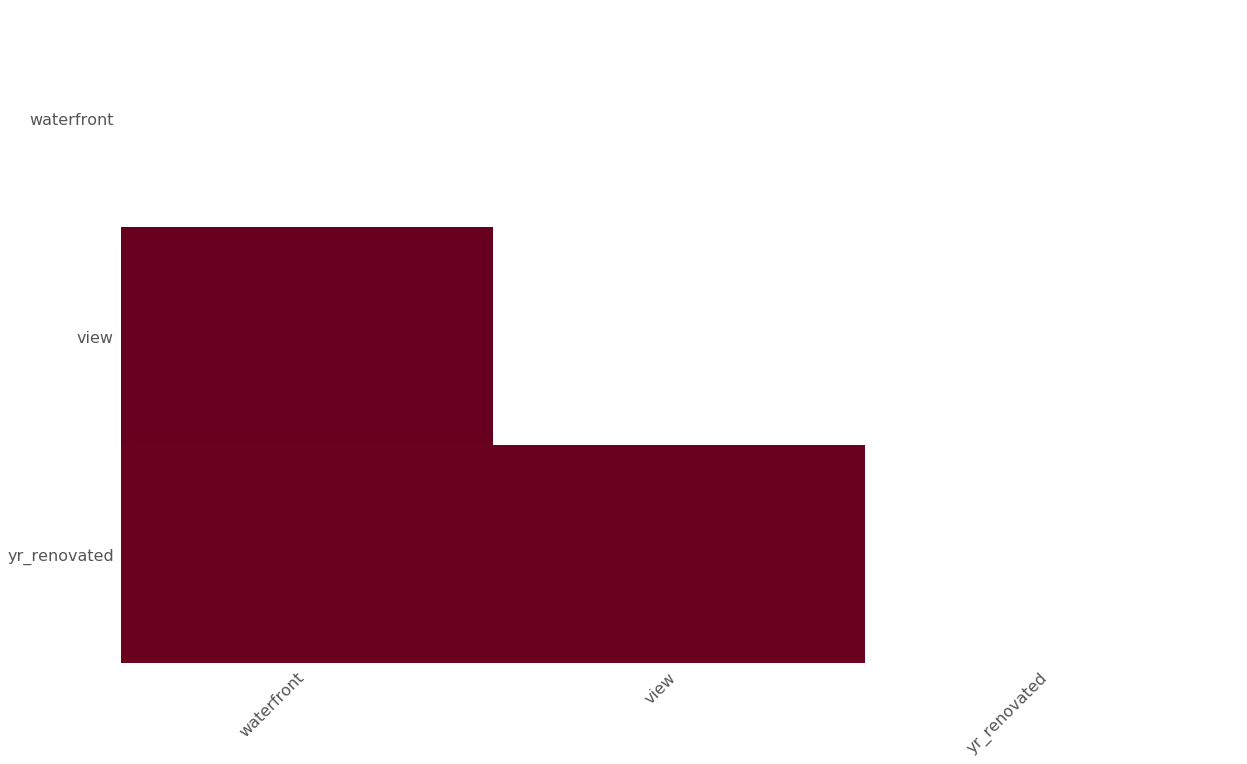

In [85]:
msno.heatmap(df)

Yep, no interaction so don't have to fret about how these values went missing for this set.

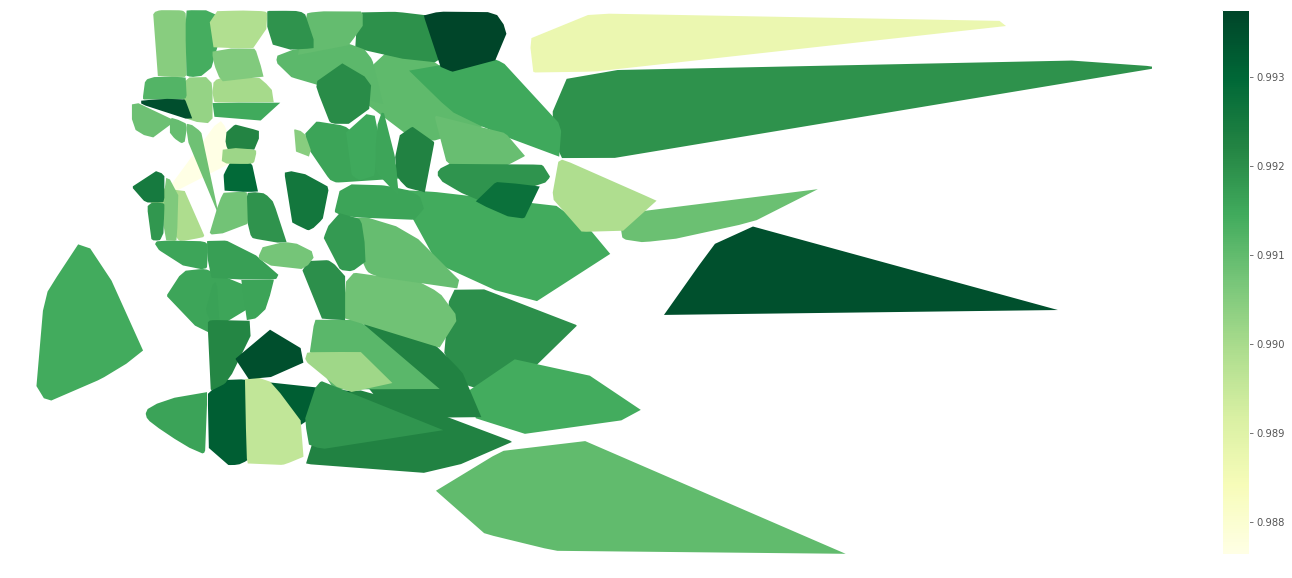

In [19]:
msno.geoplot(df, x='long', y='lat', by='zipcode')

So we are grouping this data into relative regions of lat and long, which allows up to check the geographic distribution of the missing data. The number of values left blank range by almost 10% and the distances look random enough (there is no disproption in the western rurals areas). **Look at an real map to comparison.** You can kind of see the bay...

In [12]:
import folium
n = folium.Map(
    location = [df.lat.mean(), df.long.mean()])
n

Lets start tackling the empty cells as well as checking for incorrect data types.

In [86]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Lets change sqft_basement data type


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [88]:
df.sqft_basement = df.sqft_basement.astype('float') #move this somewhere else, group by what I am doing

ValueError: could not convert string to float: '?'

It looks like there may be some placeholder in the data.

In [89]:
sum(df.sqft_basement == "?")

454

There are 454 '?' placeholders in the .sqft_basement . I will need to take care of them.

In [90]:
mask = df.sqft_basement == '?' #This sets our condtional situation.
column_name = 'sqft_basement' #what columns we effect with our mask
df.loc[mask, column_name] = 0

#df.loc[df.sqft_basement == '?', 'sqft_basement'] = 0 #Works the same way above.
#I like having options

In [91]:
df.sqft_basement = df.sqft_basement.astype('float64')

____
Will have to find a different way for the following
___

So waterfront has ~2500 NaN values. I think it will be signifigant in the final model so I am going to plot the lat/long, with pin containing the ID, and manually inspect groups of them. This way I can get a sense of geographic distribution. Maybe I could create a feature to investigate if being close to civic institutions (parks, schools, hospitals, jails,etc) has an impact on prices.

In [92]:
import folium
from folium.plugins import MarkerCluster

In [93]:
to_plot1 = df.loc[df.waterfront.isna()]
to_plot = to_plot1.loc[to_plot1.long >= -122.05] #Takes subsongets of the NaN values based on l
to_plot.shape #ensures they are bite sized chunks.

(339, 21)

In [94]:
m = folium.Map(
    location = [to_plot.lat.mean(), to_plot.long.mean()],
)

marker_cluster = MarkerCluster(
    name = 'house_prices',
    overlay = True,
    control = False,
    icon_create_function = None
)

size = len(to_plot) #total number of points
lats = list(to_plot.lat) 
lons = list(to_plot.long)
ids = list(to_plot.id)

for k in range(size): #this makes the markers. Shows the lat/long and ID.
    location = lats[k], lons[k]
    marker = folium.Marker(location=location)
    popup = 'id:{}<br>lon:{}<br>lat:{}'.format(ids[k],location[1], location[0]) 
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)


marker_cluster.add_to(m)

folium.LayerControl().add_to(m)
m

In [95]:
agua = [4047200265] #manually added IDs for waterfront properties
to_plot.waterfront = np.where(to_plot.id.isin(agua), 1, 0) #replaced the NaN with 1 for waterfront, 0 for not.
df.fillna(to_plot, inplace=True) #replaces values in the main dataframe.
df.waterfront.isna().sum() #seeing the number go down made me feel better

C:\Users\J\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


2037

In [32]:
#When I realized I made a huge mistake. #check to savetocsv

#df.to_pickle("./cleaned_data") #saving the data so I could use it again and just moving forward

In [34]:
df = pd.read_pickle('cleaned_data')
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3749
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
delta_lot           0
delta_living        0
dtype: int64

## To FINALLY clean the yr_renovated data, lets use some statistical imputation

I have to fill some of these missing yr_renovated values. I need to split them up before I know how I deal with them. What is the average year, t ,from year built that a renovation (thinking it as "the first renovation") occurs. Yes there are going to be differences between the decades but I am going assume there will be some market average buffer zone.

In [24]:

df['delta_lot'] = np.where(df.sqft_lot != df.sqft_lot15, 1, 0) #making two new columns that will let us know if there were any changes in the sqft of house or lot
df['delta_living'] = np.where(df.sqft_living != df.sqft_living15, 1, 0) #delta_lot/delta_living: 1 = changed(True) 0= no change(False)
df.yr_renovated[(df.delta_living == 0) & (df.delta_lot == 0)] = 0 #Where there are no recorded changes, I am going to assume there have been no renovations

C:\Users\J\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


reno - built = time until first renovation. Then we can safely take away a subset of data leaving us with some remaining NAN values.

In [27]:
df['1st_reno'] = df.yr_renovated - df.yr_built
df = df[df['1st_reno'] > 0] #Here is taking all the negative values in my new column and setting them to zero by the fact pandas does boolean indexing there.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 1 to 20946
Data columns (total 24 columns):
id               734 non-null int64
date             734 non-null object
price            734 non-null float64
bedrooms         734 non-null int64
bathrooms        734 non-null float64
sqft_living      734 non-null int64
sqft_lot         734 non-null int64
floors           734 non-null float64
waterfront       734 non-null float64
view             733 non-null float64
condition        734 non-null int64
grade            734 non-null int64
sqft_above       734 non-null int64
sqft_basement    734 non-null float64
yr_built         734 non-null int64
yr_renovated     734 non-null float64
zipcode          734 non-null int64
lat              734 non-null float64
long             734 non-null float64
sqft_living15    734 non-null int64
sqft_lot15       734 non-null int64
delta_lot        734 non-null int32
delta_living     734 non-null int32
1st_reno         734 non-null float64
dtypes: 

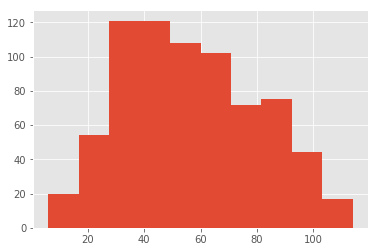

In [30]:
df['1st_reno'].hist()
df['1st_reno'].describe()
df.info()

This looks pretty normal to me. I can normalize these values to get the variables of a disrapution. I will then model randomly generated variables to replace the rest NaN values. Then we add that value to year built, should be model what they truly could be in the entire county. It will make pockets of high desnity neighborhoods impact rural districts though. It is imperfect.

In [31]:
df['norm_1st_reno'] = (df['1st_reno'] - np.mean(df['1st_reno']) / np.sqrt(np.var(df['1st_reno'])))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 1 to 20946
Data columns (total 25 columns):
id               734 non-null int64
date             734 non-null object
price            734 non-null float64
bedrooms         734 non-null int64
bathrooms        734 non-null float64
sqft_living      734 non-null int64
sqft_lot         734 non-null int64
floors           734 non-null float64
waterfront       734 non-null float64
view             733 non-null float64
condition        734 non-null int64
grade            734 non-null int64
sqft_above       734 non-null int64
sqft_basement    734 non-null float64
yr_built         734 non-null int64
yr_renovated     734 non-null float64
zipcode          734 non-null int64
lat              734 non-null float64
long             734 non-null float64
sqft_living15    734 non-null int64
sqft_lot15       734 non-null int64
delta_lot        734 non-null int32
delta_living     734 non-null int32
1st_reno         734 non-null float64
norm_1st

I deleted most of dataframe....

---
To be blunt, I gave up with this idea after this. I know there are way to do it but I couldn't either figure it out or get anything to work. I suspect some sort of pipeline could have been helpful. I was relying solely on the Learn lessons. I know now that it isn't the best tactic. I was not doing my part and looking for outside information. 


---
Now it finally take care of the 63 NaN values in view.

In [35]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [36]:
df.view.fillna(0, inplace = True) #safely replacing the missing values with zero
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3749
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
delta_lot           0
delta_living        0
dtype: int64

I will drop yr_renovted. It has given me much grief. Also going to check correlation while tossing out id.

In [37]:
df.drop('yr_renovated', axis=1, inplace=True)

In [38]:
df_pred = df.drop(['id'], axis=1)

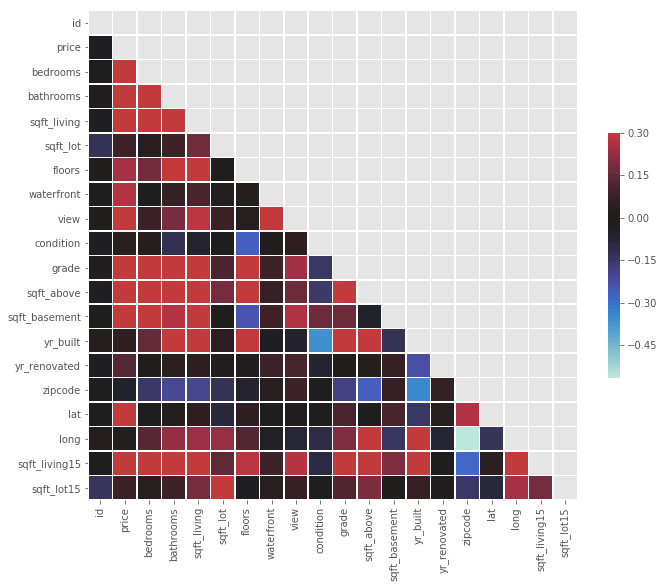

In [96]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

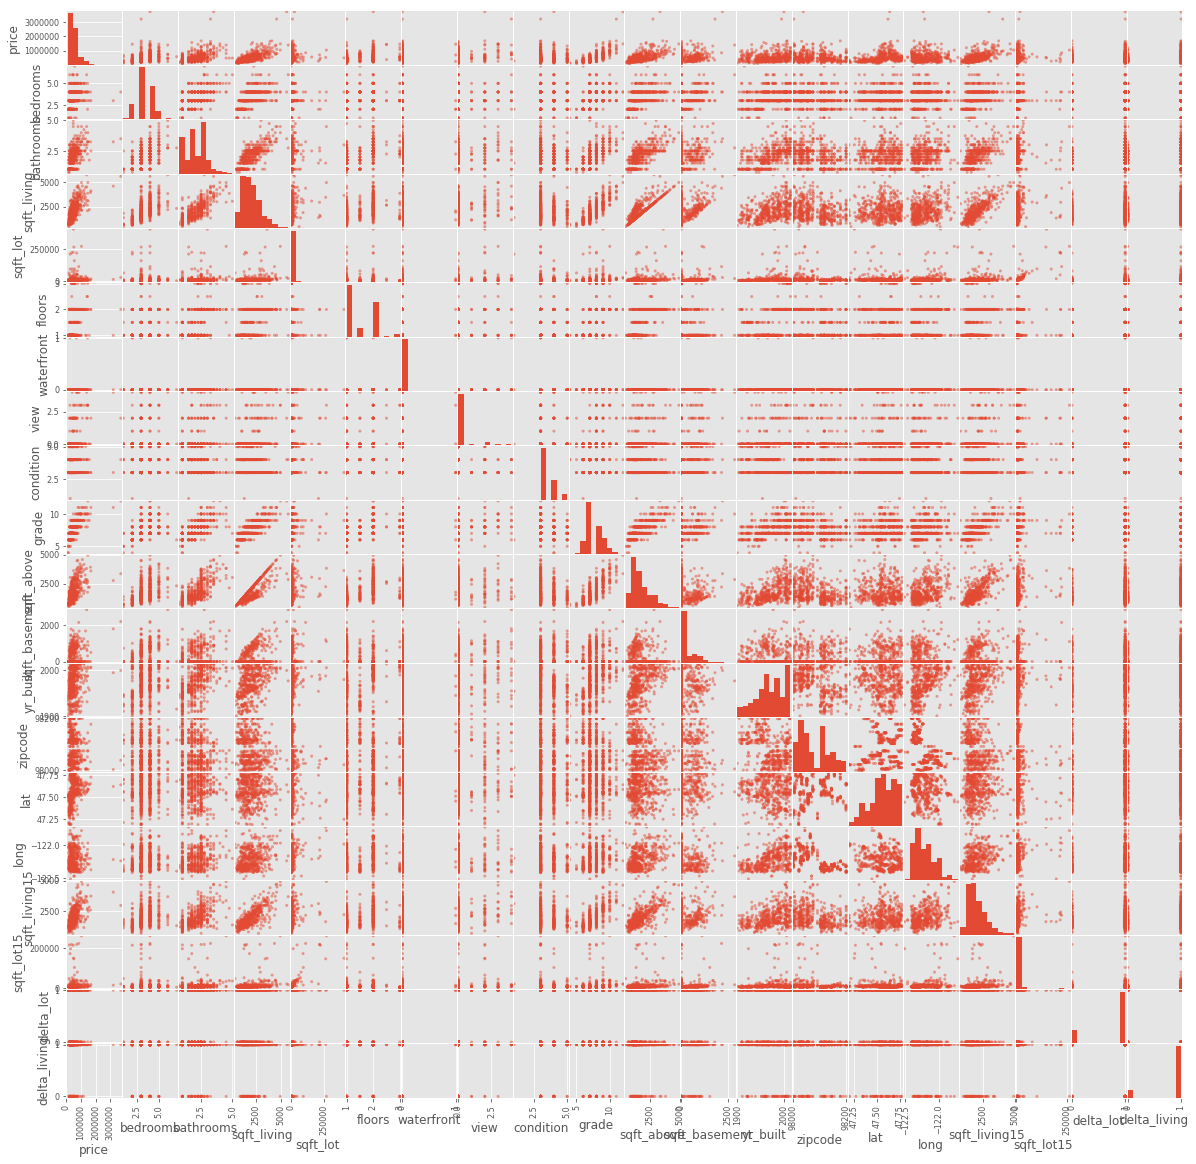

In [40]:
pd.plotting.scatter_matrix(df_pred.sample(500),figsize  = [20, 20]);

---
Looking at this in hindsight, on the second pass I am going to combine all the sqfts into one variable (I dropped basement becuase I couldn't get it to unskew). I didn't do anything with correlation
___

Lets take another look at the continious variables and see how to normalize them.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018DCDE04748>,
      dtype=object)

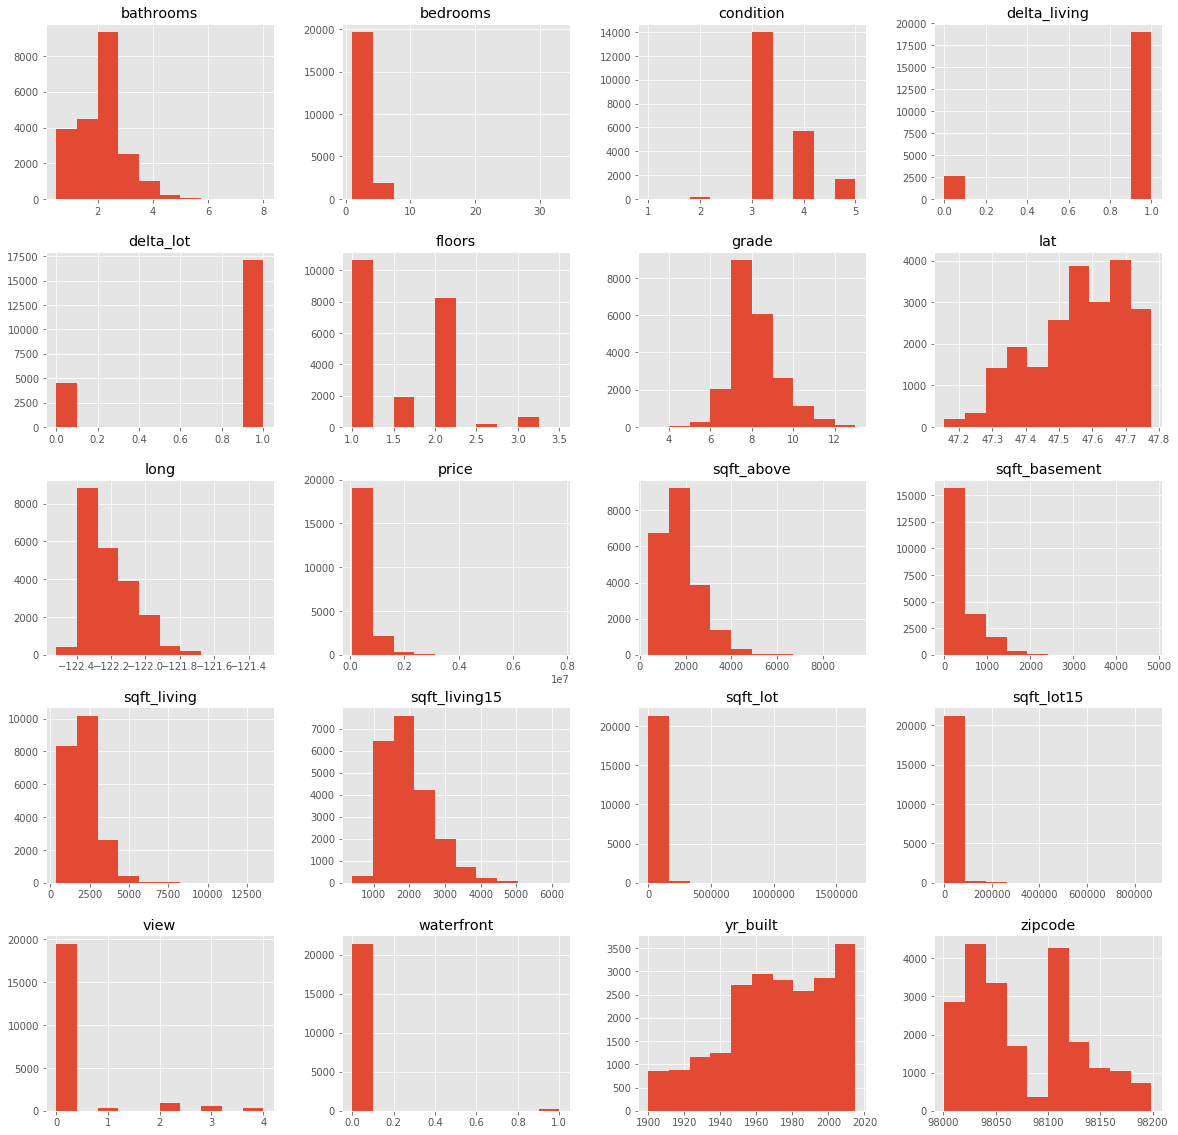

In [97]:
df_pred.hist(figsize=(20,20))

Yep, some cleaning up is required.

In [59]:
log_lot15 = np.log(df_pred.sqft_lot15) #Using the the log transformation to reduce postive skewness
log_above = np.log(df_pred.sqft_above)
#norm_basement = (df_pred.sqft_basement - df_pred.sqft_basement.mean()) / df_pred.sqft_basement.std() 
#I can't find anything that works #Basement has zero in it so we can't use log, we will use something else
log_living = np.log(df_pred.sqft_living)
log_living15 = np.log(df_pred.sqft_living15)
log_lot = np.log(df_pred.sqft_lot)

scaled_lot15 = (log_lot15-np.mean(log_lot15))/np.sqrt(np.var(log_lot15))
scaled_above = (log_above-np.mean(log_above))/np.sqrt(np.var(log_above))
#scaled_basement = (log_basement-np.mean(log_basement))/np.sqrt(np.var(log_basement))
scaled_living = (log_living-np.mean(log_living))/np.sqrt(np.var(log_living))
scaled_living15 = (log_living15-np.mean(log_living15))/np.sqrt(np.var(log_living15))
scaled_lot = (log_lot-np.mean(log_lot))/np.sqrt(np.var(log_lot))


df_pred_scaled = df_pred[['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'zipcode', 'waterfront', 'yr_built', 'grade', 'price']] #adding the catigorical data + target so I can remove the rows concerning outliers
df_pred_scaled['lot15'] = scaled_lot15
df_pred_scaled['above'] = scaled_above
#df_pred_scaled['basement'] = norm_basement
df_pred_scaled['living'] = scaled_living
df_pred_scaled['living15'] = scaled_living15
df_pred_scaled['lot'] = scaled_lot

C:\Users\J\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\J\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\J\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018DD1174D30>,
      dtype=object)

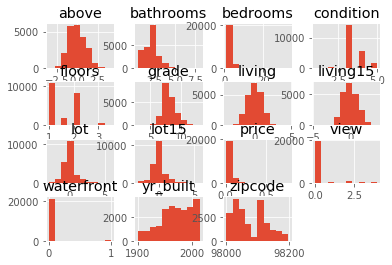

In [60]:
df_pred_scaled.hist()

The cont. variables look good. I got rid of the pesky basement becuase it was unruly and I won't have that kind of behavior in my datasets. Time to remove some outliers, if there are any. Lets check.

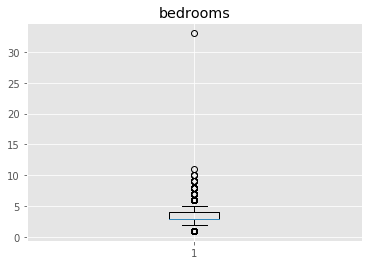

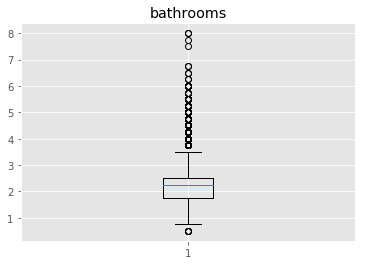

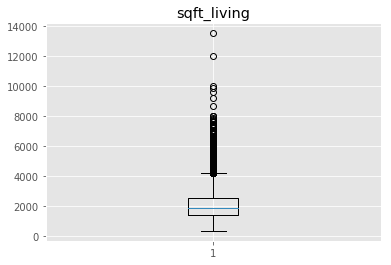

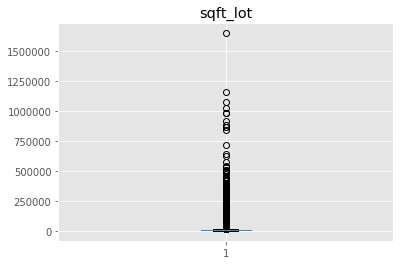

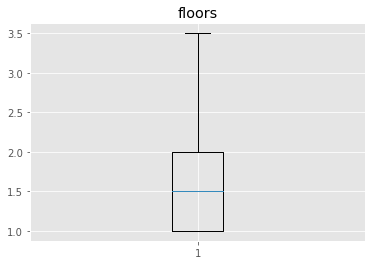

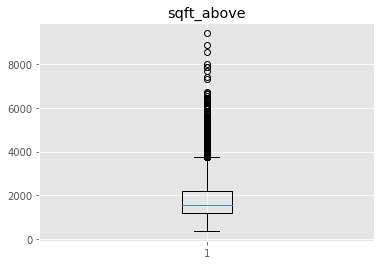

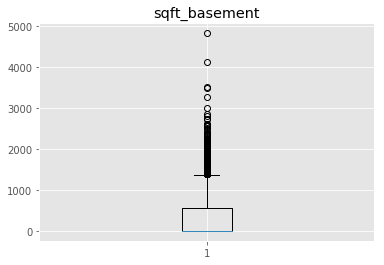

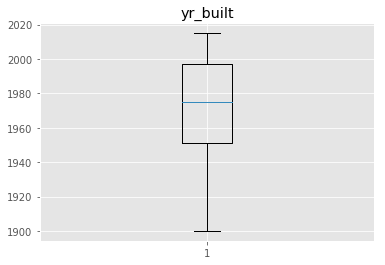

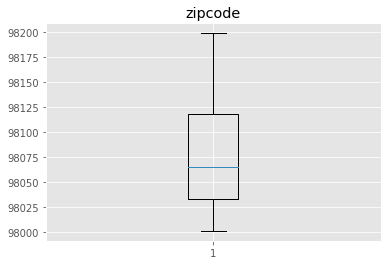

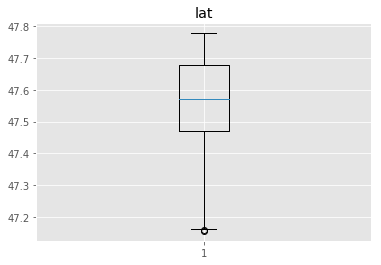

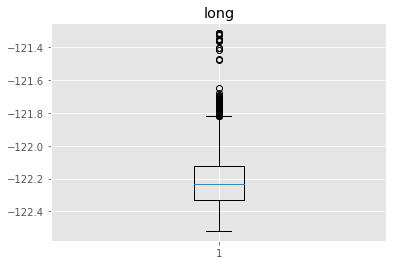

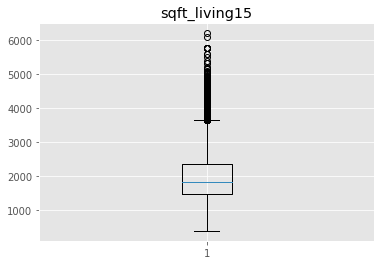

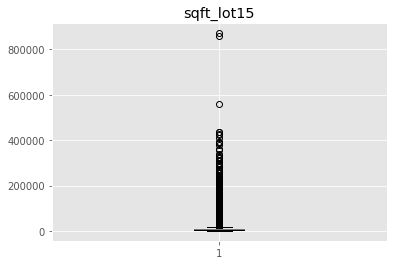

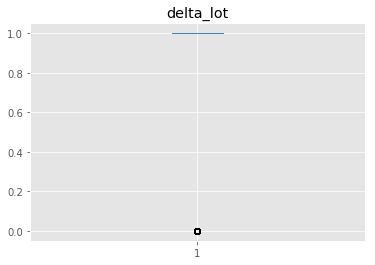

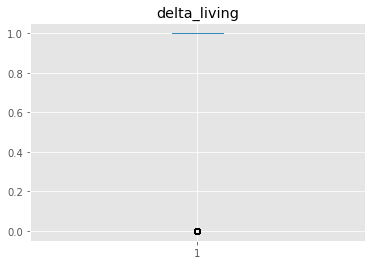

In [98]:
to_plot = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'delta_lot', 'delta_living']
for plot in to_plot:
    plt.boxplot(df_pred[plot])
    plt.title(plot)
    plt.show()

There seems to be a few outliers we have to remove. I will use the IQR to take care of them.

In [99]:
def remove_outlier(df_in, col_names):
    df_out = df_in
    for col in col_names:
        q1 = df_in[col].quantile(0.25)
        q3 = df_in[col].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_out = df_in.loc[(df_in[col] > fence_low) & (df_in[col] < fence_high)]
    return df_out

In [100]:
sliming = ['living', 'lot', 'above', 'living15', 'lot15']
df_slim = remove_outlier(df_pred_scaled, sliming)
df_slim.columns, df_slim.shape

(Index(['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'zipcode',
        'waterfront', 'yr_built', 'grade', 'price', 'lot15', 'above', 'living',
        'living15', 'lot'],
       dtype='object'), (19110, 15))

Looks like it did remove some of my outliers. Great. I did forget to normalize my target though. So lets take care of that and now get the dummies for my catagories.

In [101]:
df_slim['price'] = np.log(df_slim.price)

bedroom_dummies = pd.get_dummies(df_slim.bedrooms, prefix="bedroom")
bathroom_dummies = pd.get_dummies(df_slim.bathrooms, prefix='bathrooms')
floors_dummies = pd.get_dummies(df_slim.floors, prefix="floors")
view_dummies = pd.get_dummies(df_slim.view, prefix="view")
condition_dummies = pd.get_dummies(df_slim.condition, prefix="condition")
zipcode_dummies = pd.get_dummies(df_slim.zipcode, prefix="zip")
grade_dummies = pd.get_dummies(df_slim.grade, prefix="grade")
waterfront_dummies = pd.get_dummies(df_slim.waterfront, prefix="waterfront")
yr_built_dummies = pd.get_dummies(df_slim.yr_built, prefix="yr_built")


df_final = pd.concat([df_slim,bedroom_dummies,bathroom_dummies,floors_dummies,view_dummies,condition_dummies,zipcode_dummies,grade_dummies, waterfront_dummies, yr_built_dummies],axis=1)

df_final.drop(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'zipcode'], axis=1,inplace=True)

C:\Users\J\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Finally need to make them catagorical, my dummies that is.

In [102]:
for col in df_final.iloc[:,6:]:
    df_final[col] = df_final[col].astype('category')
df_final.iloc[:,6:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19110 entries, 0 to 21594
Columns: 255 entries, bedroom_1 to yr_built_2015
dtypes: category(255)
memory usage: 4.8 MB


## Lets try to find our inital model.

I am going to look for an accurate model for our data. This would be used for real estate appraisal in this given area.

In [66]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

y = df_final.price
X = df_final.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [67]:
from sklearn.linear_model import Lasso

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test) #This score is R^2
coeff_used001 = np.sum(lasso001.coef_!=0)


In [68]:
train_score001, test_score001 ,coeff_used001

(0.5529353530537937, 0.5494416315417439, 15)

In [69]:

lasso0001 = Lasso(alpha=0.001, max_iter=10e5)
lasso0001.fit(X_train,y_train)

train_score0001=lasso0001.score(X_train,y_train)
test_score0001=lasso0001.score(X_test,y_test) #This score is R^2
coeff_used0001 = np.sum(lasso0001.coef_!=0)

In [70]:
train_score0001, test_score0001 ,coeff_used0001

(0.8627229228058954, 0.8609790470363365, 81)

In [78]:
temp = lasso001.coef_
coef1 = pd.DataFrame(list(zip(X_train.columns, temp))) #Gives me what I want.